In [1]:
from components.model import Net
from dataloader import Cifar10Dataloader
import torch
from torch.utils.data import DataLoader
from components.predictor import Predictor
from eval import eval_model
import torch.nn.functional as F
from components.parameters import EPOCHS, BATCH_SIZE, set_no_grad
from components.combined import CombinedModel

Files already downloaded and verified


In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [4]:
trained_student = Net().to(device)
trained_student.load_state_dict(torch.load("student_model"))

<All keys matched successfully>

In [6]:
random_student = Net().to(device)

In [5]:
dataloader = DataLoader(
    Cifar10Dataloader(),
    batch_size=64,
    shuffle=True,
)

Files already downloaded and verified


In [7]:
import matplotlib.pyplot as plt

In [9]:
X, y = next(iter(dataloader))
X = X.to(device)
y_random = random_student(X)
y_trained = trained_student(X)

/usr/lib/python3/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


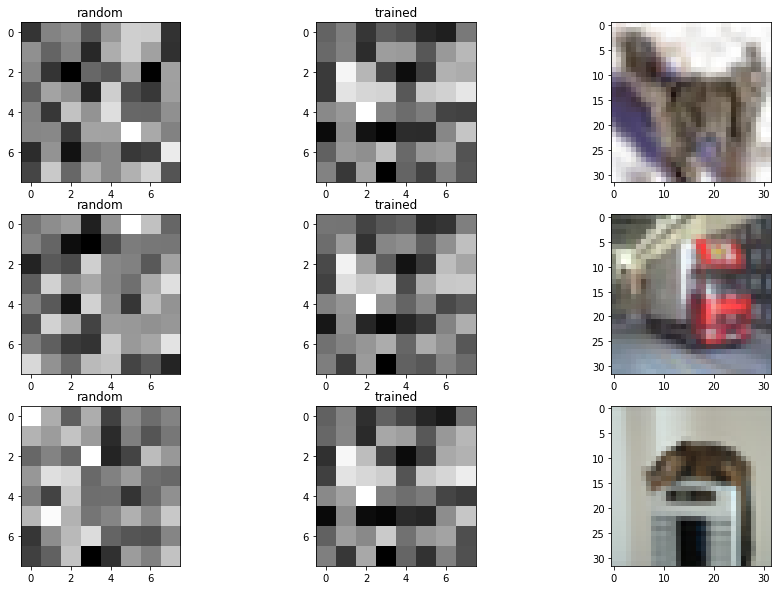

In [54]:
count = 3
f, axes = plt.subplots(count,3, figsize=(15,10))
for i in range(count):
    axes[i][0].imshow(y_random[i].reshape(8, 8, 1).cpu().detach().numpy(), cmap="gray")
    axes[i][0].set_title('random')
    axes[i][1].imshow(y_trained[i].reshape(8, 8, 1).cpu().detach().numpy(), cmap="gray")
    axes[i][1].set_title('trained')
    axes[i][2].imshow(X[i].cpu().permute(1, 2, 0).numpy())

### Train

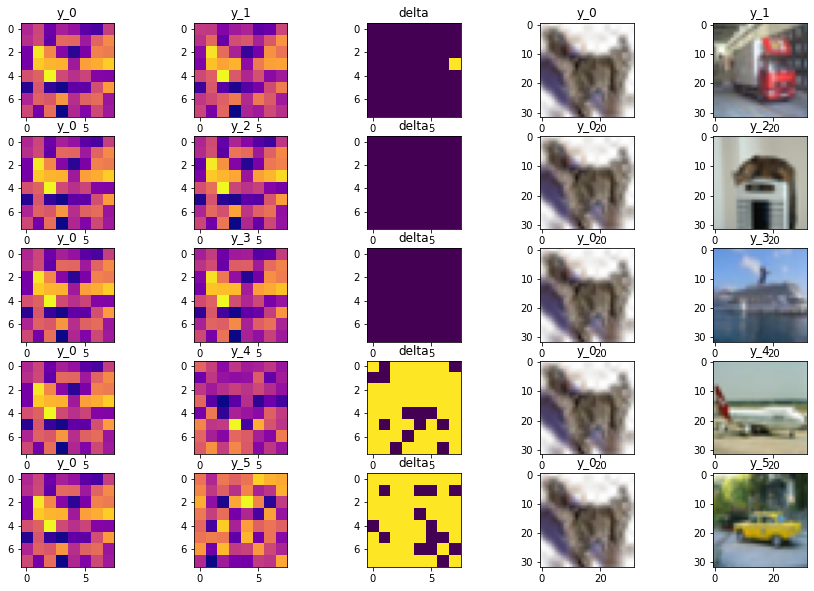

In [56]:
import numpy as np

count = 5
f, axes = plt.subplots(count, 5, figsize=(15,10))
for i in range(count):
    axes[i][0].imshow(y_trained[0].reshape(8, 8, 1).cpu().detach().numpy(), cmap="plasma")
    axes[i][0].set_title('y_0')
    axes[i][1].imshow(y_trained[i + 1].reshape(8, 8, 1).cpu().detach().numpy(), cmap="plasma")
    axes[i][1].set_title(f"y_{i+1}")
    axes[i][2].set_title('delta')
    axes[i][2].imshow((
        np.abs(
            y_trained[0].reshape(8, 8, 1).cpu().detach().numpy() - 
            y_trained[i + 1].reshape(8, 8, 1).cpu().detach().numpy()
        )) > 0.1
    )
    
    axes[i][3].imshow(X[0].cpu().permute(1, 2, 0).numpy())
    axes[i][3].set_title('y_0')
    axes[i][4].imshow(X[i + 1].cpu().permute(1, 2, 0).numpy())
    axes[i][4].set_title(f"y_{i+1}")

### Random

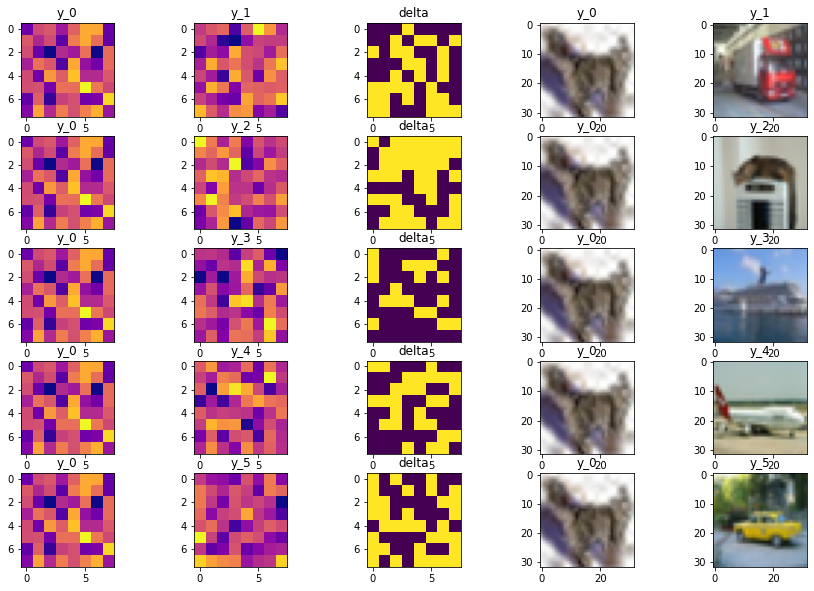

In [55]:
import numpy as np

count = 5
f, axes = plt.subplots(count, 5, figsize=(15,10))
for i in range(count):
    axes[i][0].imshow(y_random[0].reshape(8, 8, 1).cpu().detach().numpy(), cmap="plasma")
    axes[i][0].set_title('y_0')
    axes[i][1].imshow(y_random[i + 1].reshape(8, 8, 1).cpu().detach().numpy(), cmap="plasma")
    axes[i][1].set_title(f"y_{i+1}")
    axes[i][2].set_title('delta')
    axes[i][2].imshow((
        np.abs(
            y_random[0].reshape(8, 8, 1).cpu().detach().numpy() - 
            y_random[i + 1].reshape(8, 8, 1).cpu().detach().numpy()
        )) > 0.1
    )
    
    axes[i][3].imshow(X[0].cpu().permute(1, 2, 0).numpy())
    axes[i][3].set_title('y_0')
    axes[i][4].imshow(X[i + 1].cpu().permute(1, 2, 0).numpy())
    axes[i][4].set_title(f"y_{i+1}")